# Unsupervised Learning


### Implement the K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization. The algorithm must be implemented as a function with arguments (dataset). Usage of any library that has an implementation is forbidden. The last column, Species needs to be removed before giving it as argument to the function. The column needs to stored in another variable for future comparison. For Principal Component Analysis, the data (without Species column) must be plotted in the first three eigenvectors and the eigenvalues for the corresponding values should also be noted. In clustering, two plots one showing the output of the cluster and one showing actual species should be displayed. The code must be uploaded to the portal and GitHub and be in Python Notebook format (.ipynb file). The GitHub link is to be attached. The repository has to be open.Evaluation will be done on the code formatting, the final accuracy results, and small explanations of any data preprocessing done (data preprocessing and visualization has bonus points). The explanations must also be included in the same python notebook which can be done using markdown cells.The Python version to be used must be above 3.5.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from mpl_toolkits import mplot3d
from collections import defaultdict
from sklearn import datasets
from sklearn.datasets import make_blobs
import os, cv2, json
np.random.seed(24)
#importing all modules we are going to need.

In [17]:
#df = pd.read_csv('C:\\Users\\91923\\Downloads\\Iris Dataset\\Iris Dataset.csv')
iris=datasets.load_iris()
df=datasets.load_iris(as_frame=True)
#we are using sklearn instead of reading from a csv as it reduces dependency.

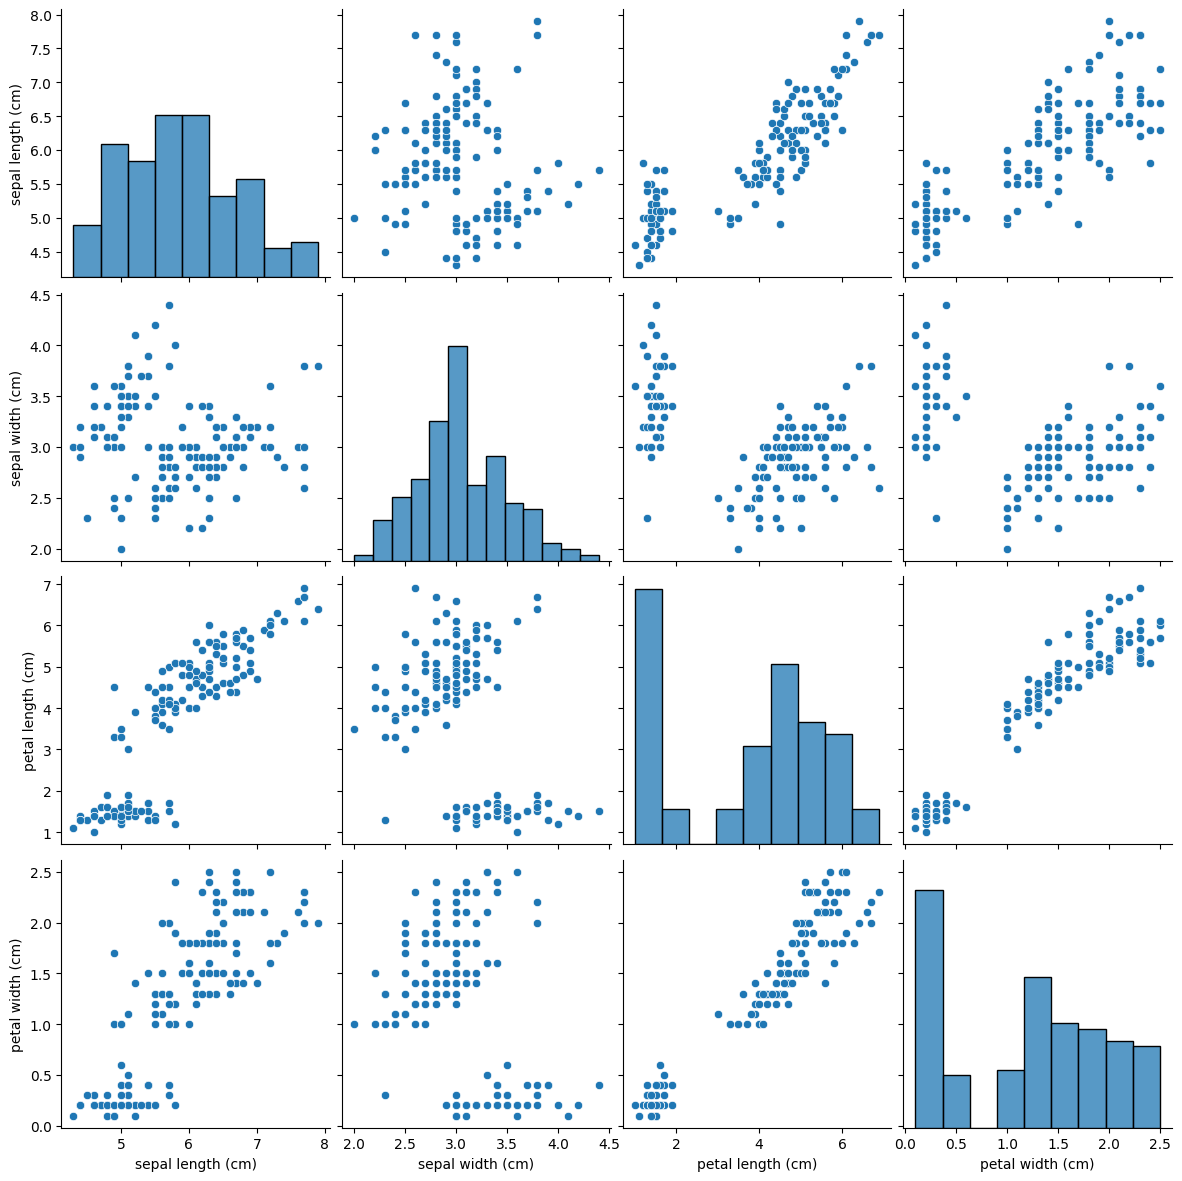

In [18]:
sns.pairplot(df['data'], height=3)


In [19]:
def PCA(X , num_components):
     
  
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced
X=pd.DataFrame(iris.data,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y=pd.DataFrame(iris.target,columns=['Classes'])
X

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
X['species'] = pd.Series(np.random.randn(150), index=X.index)
X['species'][y['Classes']==0]='Setosa'
X['species'][y['Classes']==1]='versicolor'
X['species'][y['Classes']==2]='virginica'
X
X.shape
# Assigning numerical values to the target classes

C:\Users\91923\AppData\Local\Temp\ipykernel_22516\291216890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['species'][y['Classes']==1]='versicolor'
C:\Users\91923\AppData\Local\Temp\ipykernel_22516\291216890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['species'][y['Classes']==2]='virginica'


(150, 5)

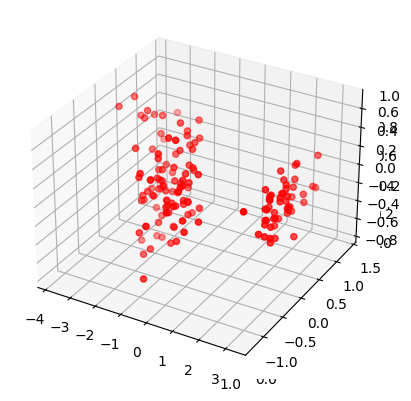

In [21]:
pc=PCA(iris.data[:,:4],3)
df=pd.DataFrame(pc, columns=['X','Y','Z'])
df
pc
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(df['X'], df['Y'], df['Z'], c='red');
# Plotting the 3-dimensional PCA 

In [22]:
clusters=len(np.unique(y))
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [23]:
#Implementing the kmeans algorithm. 
from collections import defaultdict


class KMeans:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]



        r=0


        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]


                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):

                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0



            if flg==1:
                break


        return classes,centroids

In [24]:
kmeans=KMeans(iris.data[:,:4],clusters,10000)

classes,centroids=kmeans.predict()


for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print(centroids)

39
61
50
defaultdict(<class 'int'>, {0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.428, 1.462, 0.246])})


In [25]:
# Defining the performance metrics
class0=[]
class1=[]
class2=[]

for i in range(len(iris.target)):
    if iris.target[i]==0:
        class0.append(iris.data[i])
    elif iris.target[i]==1:
        class1.append(iris.data[i])
    elif iris.target[i]==2:
        class2.append(iris.data[i])


class0=np.array(class0).tolist()
class1=np.array(class1).tolist()
class2=np.array(class2).tolist()




def subset(array1,array2):
    flg=0
    for i in range(len(array1)):
        if(array2==array1[i]):
            flg=1
            break
    if(flg==1):
        return True
    else:
        return False
    


    
def confusion_matrix(a,b,c,classes,):
    
    cm=[[0 for i in range(y.Classes.nunique())] for i in range(y.Classes.nunique())]

    for element in a:

        if subset(classes[2],element):
            cm[0][0]=cm[0][0]+1
        elif subset(classes[1],element):
            cm[0][1]=cm[0][1]+1
        elif subset(classes[0],element):
            cm[0][2]=cm[0][2]+1

    for element in b:

        if subset(classes[2],element):
            cm[1][0]=cm[1][0]+1
        elif subset(classes[1],element):
            cm[1][1]=cm[1][1]+1
        elif subset(classes[0],element):
            cm[1][2]=cm[1][2]+1

    for element in c:

        if subset(classes[2],element):

            cm[2][0]=cm[2][0]+1
        elif subset(classes[1],element):

            cm[2][1]=cm[2][1]+1
        elif subset(classes[0],element):

            cm[2][2]=cm[2][2]+1
            
    return cm



            
class Metrics:
    
    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))
    
    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy
    
    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall
    
    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)
        return precision
    
    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)
        
        return f1_score
matrix=confusion_matrix(class0,class1,class2,classes)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("Accuracy of the model is {}".format(accuracy*100))
print("F1-Score of the model is {}".format(f1_score*100))


confusion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Recall of the model is 88.66666666666667
Precision of the model is 89.78562421185372
Accuracy of the model is 88.66666666666667
F1-Score of the model is 89.22263731397425
